In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [43]:
data = pd.read_csv('C:/Users/abdul/Downloads/TRYX.csv')
data = data.dropna()
data.head()
data.dropna(inplace=True)
data.isnull().sum()
print(data.head()) 

         Date     Open     High      Low    Close  Adj Close  Volume
0  2013-01-01  1.78180  1.78180  1.78180  1.78180    1.78180     0.0
1  2013-01-02  1.78140  1.78200  1.77400  1.78140    1.78140     0.0
2  2013-01-03  1.77778  1.78250  1.77648  1.77778    1.77778     0.0
3  2013-01-04  1.78560  1.79053  1.78364  1.78420    1.78420     0.0
4  2013-01-07  1.78058  1.78624  1.77900  1.78048    1.78048     0.0


In [44]:
data['Date'] = pd.to_datetime(data['Date'])

data.set_index('Date', inplace=True)

In [45]:
X = data[['Open', 'High', 'Low', 'Close']]
y = data['Adj Close']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [53]:
# Predict and evaluate the model
predictions = model.predict(X_test)
mse = np.mean((predictions - y_test) ** 2)
print(f"Mean Squared Error: {mse}") 

predictions

Mean Squared Error: 2.410870643651238e-30


array([ 2.24524 ,  4.9179  , 13.5226  ,  5.3194  ,  3.741   ,  3.75863 ,
        3.5529  ,  8.37641 ,  2.9275  ,  5.7476  , 26.3095  , 26.947001,
        2.09542 ,  5.7115  ,  2.9678  ,  2.92009 ,  2.2194  ,  2.03806 ,
        2.10141 ,  2.87014 ,  2.93334 ,  3.40274 ,  3.88636 , 13.6032  ,
        5.701   ,  5.55962 ,  7.4791  ,  3.2867  ,  5.6956  ,  7.0883  ,
        4.6213  ,  5.5153  , 13.4961  , 18.482651,  6.8473  ,  2.84985 ,
       18.807449,  1.9365  , 18.6399  , 27.193399, 19.2048  ,  6.15523 ,
        3.74998 , 13.57721 ,  4.7561  ,  7.9309  ,  5.74568 ,  2.21176 ,
       19.5397  ,  3.45587 ,  5.98694 , 19.175699,  5.21194 , 21.080299,
       18.491619,  2.88786 ,  2.52071 , 17.236401,  4.23814 ,  3.1624  ,
        2.22726 , 18.608999,  4.03941 ,  2.92433 ,  2.8634  ,  1.93277 ,
        8.58405 , 14.6218  ,  7.0837  , 28.495199,  3.03429 ,  2.0086  ,
        7.75576 , 18.8297  ,  5.72582 ,  2.21777 ,  7.4338  ,  5.6491  ,
        2.874   ,  2.15776 , 26.7806  ,  3.10631 , 

In [49]:
# Display the coefficients
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Coefficients: [-1.31231283e-14  4.44089210e-16 -2.22044605e-16  6.90323979e+00]
Intercept: 7.42356772830937


In [58]:
last_date = data.index[-1]
forecast_dates = pd.date_range(start=last_date, periods=865)

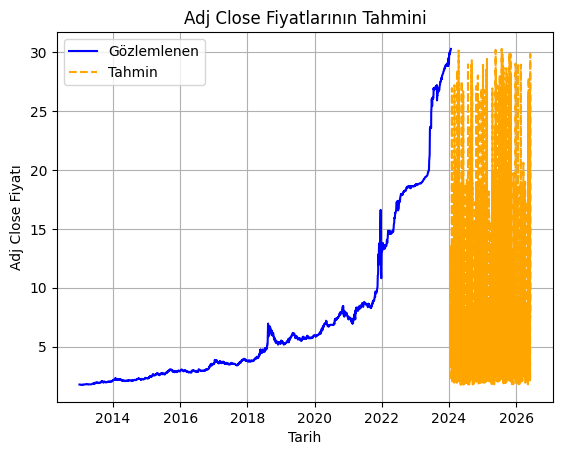

In [59]:

# Tahminleri bir DataFrame'e eklemek
forecast = pd.DataFrame(predictions, index=forecast_dates, columns=['Forecast'])


# Tahmin grafiği oluşturma

plt.plot(data.index, data['Adj Close'], label='Gözlemlenen', color='blue')
plt.plot(forecast.index, forecast['Forecast'], label='Tahmin', color='orange', linestyle='--')
plt.title('Adj Close Fiyatlarının Tahmini')
plt.xlabel('Tarih')
plt.ylabel('Adj Close Fiyatı')
plt.legend()
plt.grid(True)
plt.show()